In [1]:
graph = dict()

graph['A'] = ['B', 'C']
graph['B'] = ['A', 'D']
graph['C'] = ['A', 'G', 'H', 'I']
graph['D'] = ['B', 'E', 'F']
graph['E'] = ['D']
graph['F'] = ['D']
graph['G'] = ['C']
graph['H'] = ['C']
graph['I'] = ['C', 'J']
graph['J'] = ['I']

In [2]:
graph

{'A': ['B', 'C'],
 'B': ['A', 'D'],
 'C': ['A', 'G', 'H', 'I'],
 'D': ['B', 'E', 'F'],
 'E': ['D'],
 'F': ['D'],
 'G': ['C'],
 'H': ['C'],
 'I': ['C', 'J'],
 'J': ['I']}

need_visit 스택 과 visited 큐가 필요

In [3]:
def dfs(graph, start_node):
    visited, need_visit = list(), list()
    need_visit.append(start_node)
    
    while need_visit:
        #need_visit은 스택이므로, 맨 마지막 요소를 꺼내기 위해 .pop() 을 쓰는거다. 
        node = need_visit.pop()
        if node not in visited:
            visited.append(node)
            need_visit.extend(graph[node])
            
    return visited

In [4]:
dfs(graph, 'A')

['A', 'C', 'I', 'J', 'H', 'G', 'B', 'D', 'F', 'E']

In [5]:
dfs(graph, 'E')

['E', 'D', 'F', 'B', 'A', 'C', 'I', 'J', 'H', 'G']

In [6]:
# list 로도 구현할 수 있지만, 시간복잡도가 높기에 큐를 구현할 때는 deque 라이브러리를 사용하는것이 좋다.
from collections import deque

In [7]:
queue = deque()

queue.append(5)
queue.popleft() # 가장 먼저 들어와있던 요소 (left에 위치) pop 해줌
queue.append(2)
queue.append(3)
queue.append(7)

queue.append(1)
queue.append(4)
queue.popleft()

print(queue)

deque([3, 7, 1, 4])


In [8]:
queue.reverse()
print(queue)

deque([4, 1, 7, 3])


# 재귀 함수

- 재귀 함수(Recursive Function)란 자기 자신을 다시 호출하는 함수를 의미

In [12]:
def recursive_function():
    print('재귀 함수를 호출합니다')
    recursive_function()

In [13]:
# recursive_function()
#반복적으로 자기 자신을 호출하기에, 오류 메시지가 출력됨. 

: 

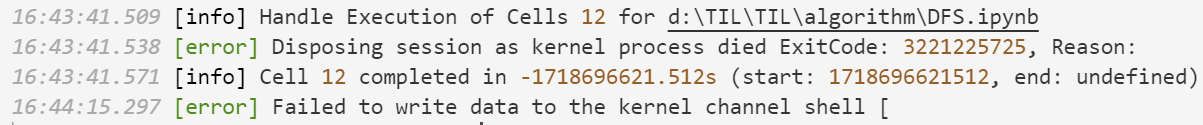

- 재귀 함수를 사용할 때는 반드시 종료 조건을 명시해야 함.
- 종료 조건을 제대로 명시하지 않으면 함수가 무한히 호출될 수 있음.

- 우리가 의도적으로 무한루프를 이용하는게 아니라면!

In [2]:
def recursive_func(i):
    if i ==10:
        return
    print(i, '번째 재귀함수에서', i+1, '번째 재귀함수를 호출합니다.')
    recursive_func(i+1)
    print(i, '번째 재귀함수를 종료합니다.')
    
recursive_func(1)

1 번째 재귀함수에서 2 번째 재귀함수를 호출합니다.
2 번째 재귀함수에서 3 번째 재귀함수를 호출합니다.
3 번째 재귀함수에서 4 번째 재귀함수를 호출합니다.
4 번째 재귀함수에서 5 번째 재귀함수를 호출합니다.
5 번째 재귀함수에서 6 번째 재귀함수를 호출합니다.
6 번째 재귀함수에서 7 번째 재귀함수를 호출합니다.
7 번째 재귀함수에서 8 번째 재귀함수를 호출합니다.
8 번째 재귀함수에서 9 번째 재귀함수를 호출합니다.
9 번째 재귀함수에서 10 번째 재귀함수를 호출합니다.
9 번째 재귀함수를 종료합니다.
8 번째 재귀함수를 종료합니다.
7 번째 재귀함수를 종료합니다.
6 번째 재귀함수를 종료합니다.
5 번째 재귀함수를 종료합니다.
4 번째 재귀함수를 종료합니다.
3 번째 재귀함수를 종료합니다.
2 번째 재귀함수를 종료합니다.
1 번째 재귀함수를 종료합니다.


# 팩토리얼 구현 예제 

In [3]:
def factorial_iteractive(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result

In [4]:
def factorial_recursive(n):
    # 만약 1 이하이면, return 1
    if n <= 1:
        return 1
    # 계속 반복적으로, n-1 씩 곱하면서, 자기자신을 호출한다(재귀함수)
    return n * factorial_recursive(n -1)

In [6]:
print('반복적으로 구현:', factorial_iteractive(5))
print('재귀적으로 구현:', factorial_recursive(5))

반복적으로 구현: 120
재귀적으로 구현: 120


# DFS (Depth-First Search)

- DFS는 깊이 우선 탐색. 그래프에서 깊은 부분을 우선적으로 탐색하는 알고리즘.
- DFS는 스택 자료구조(혹은 재귀 함수)를 이용.
    1. 탐색 시작 노드를 스택에 삽입하고 방문 처리함.
    2. 스택의 최상단 노드에 방문하지 않은 인접한 노드가 하나라도 있으면 그 노드를 스택에 넣고 방문 처리함. 방문하지 않은 인접 노드가 없으면 스택에서 최상단 노드를 꺼냄.  (<- 이부분 설명이 이해가 잘 안감 ㅠㅠ)
    3. 더 이상 2번의 과정을 수행할 수 없을때까지 반복.

In [1]:
def dfs(graph, v, visited): #기존 그래프, 탐색 시작 노드, 방문한 노드
    visited[v] = True   #방문한 노드의 [탐색 시작 노드] = True 로, 방문했음을 표현
    print(v, end=' ')
    
    for i in graph[v]:
        if not visited[i]:
            dfs(graph, i, visited)

In [2]:
# 각 노드가 연결된 정보를 표현 (2차원 리스트)
graph = [
    [], #인덱스 0에 대해서는 비워두는 편.
    [2, 3, 8],
    [1, 7],
    [1, 4, 5],
    [3, 5],
    [3, 4],
    [7],
    [2, 6, 8],
    [1, 7]
]

In [3]:
# 방문한 리스트는 일단 False. (1차원 리스트)
visited = [False]*9     # *9를 한 이유는, graph 에서 비워둔 하나의 배열이라서. 

In [4]:
dfs(graph, 1, visited)

1 2 7 6 8 3 4 5 

# BFS(Breadth-First Search)

- BFS는 너비 우선 탐색. 그래프에서 가까운 노드부터 우선적으로 탐색하는 알고리즘.
- BFS는 큐 자료구조를 이용.
    1. 탐색 시작 노드를 큐에 삽입하고 방문 처리.
    2. 큐에서 노드를 꺼낸 뒤에 해당 노드의 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입하고 방문 처리.
    3. 더 이상 2번의 과정을 수행할 수 없을 때까지 반복. 

In [12]:
from collections import deque

In [17]:
def bfs(graph, start, visited):
    queue = deque([start])
    visited[start] = True
    
    while queue:
        v = queue.popleft()
        print(v, end=' ')
        
        for i in graph[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True

In [21]:
graph = [
    [], #인덱스 0에 대해서는 비워두는 편.
    [2, 3, 8],
    [1, 7],
    [1, 4, 5],
    [3, 5],
    [3, 4],
    [7],
    [2, 6, 8],
    [1, 7]
]

visited = [False] * 9

In [22]:
bfs(graph, 1, visited)

1 2 3 8 7 4 5 6 

# 문제풀이

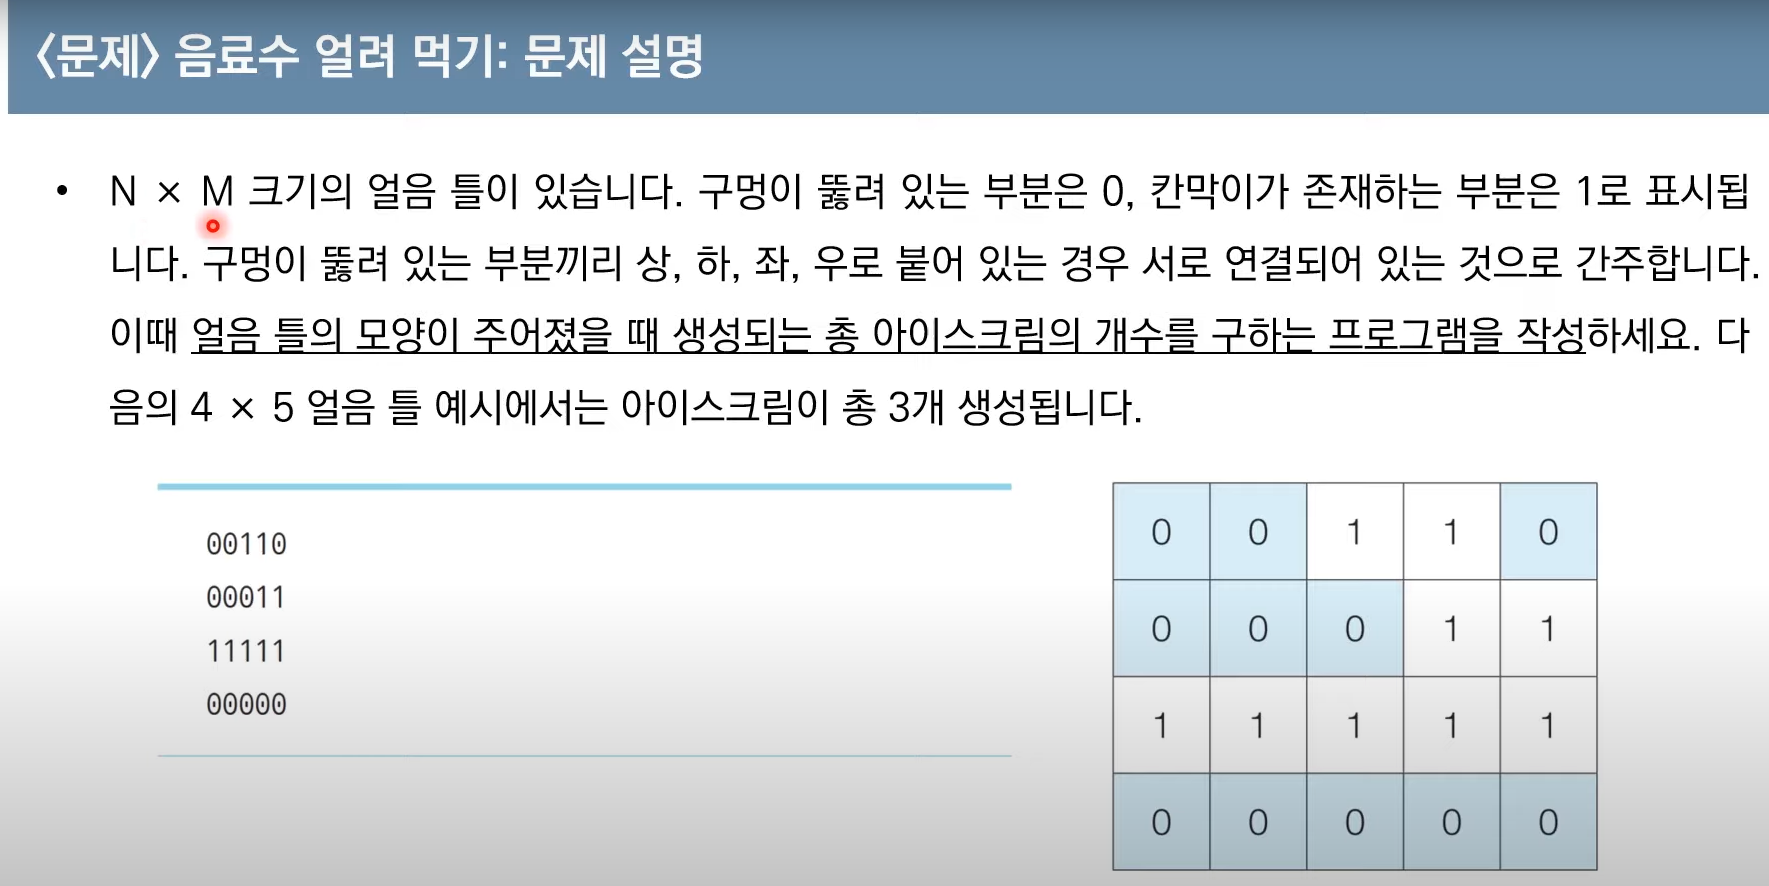

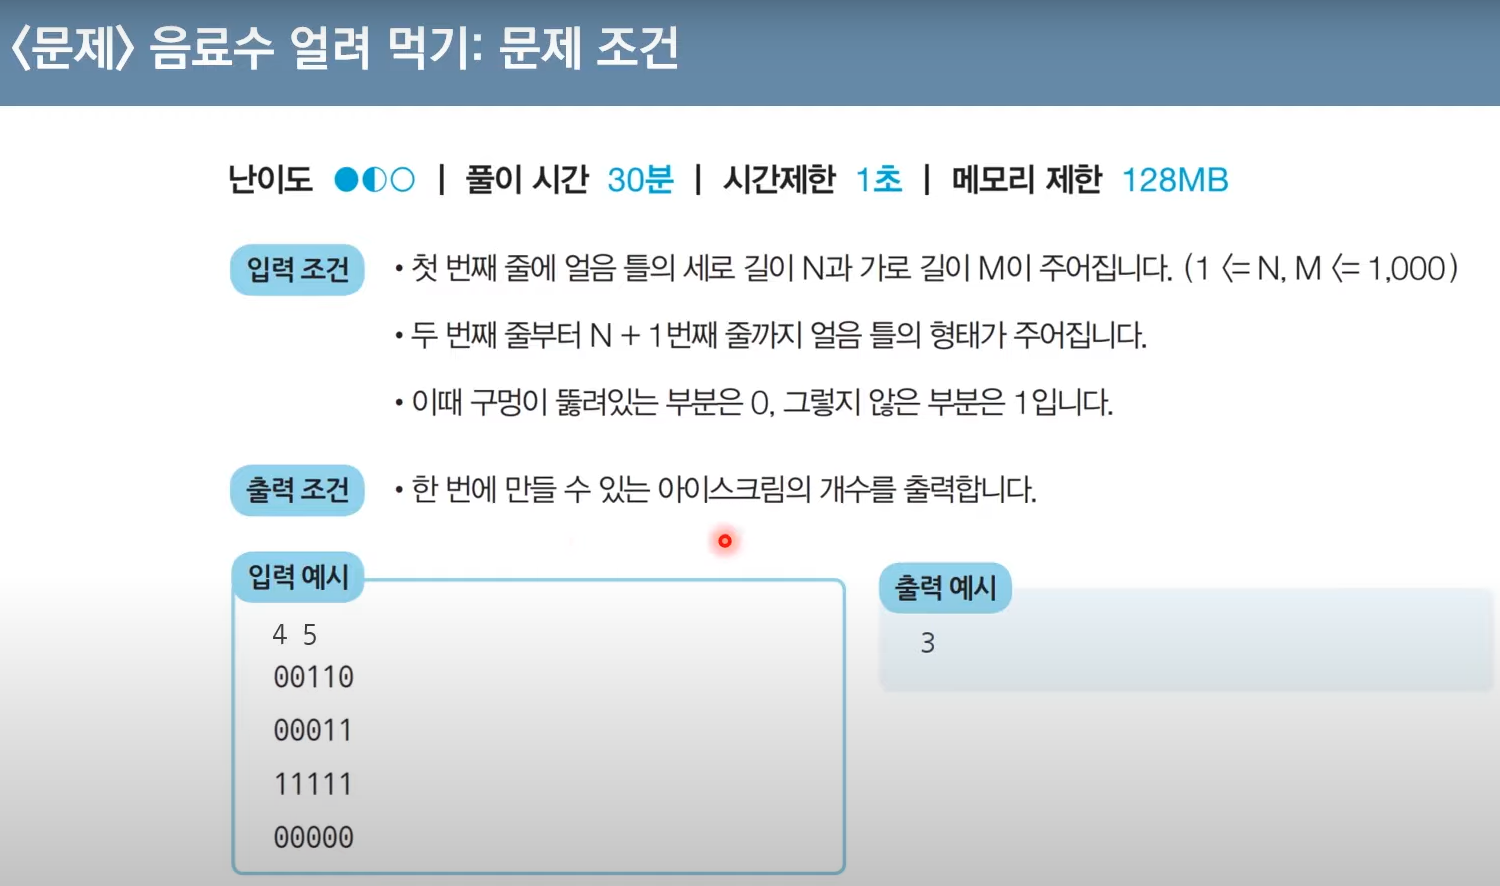

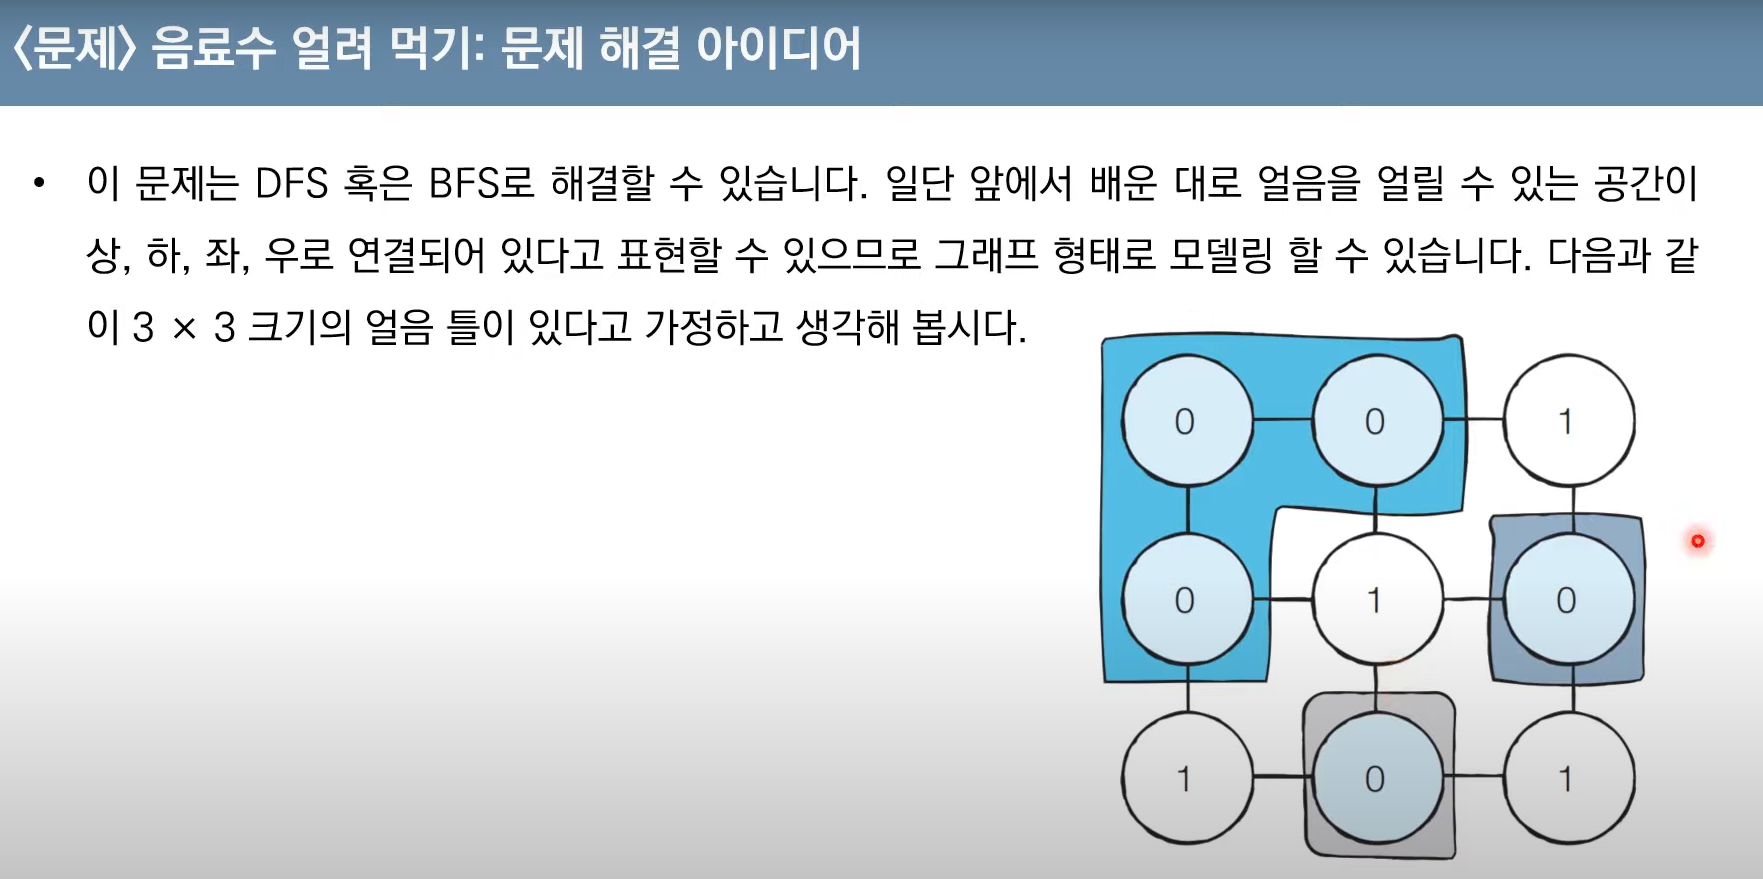

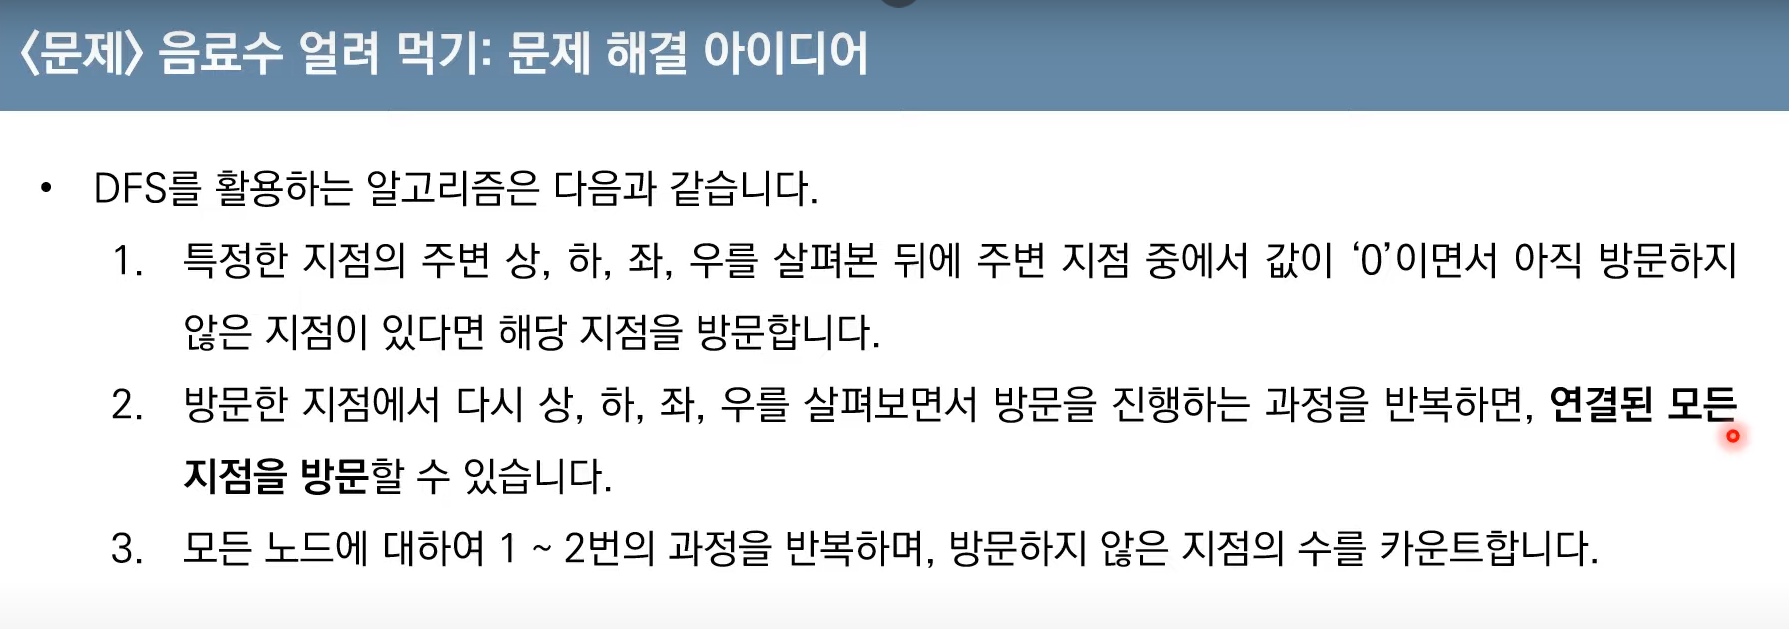

In [8]:
# 매개변수로 주어지는 x는 행번호 = 0(range로인해서 0부터 n-1까지라서)부터 n-1까지. y는 열번호 이므로 0부터 m-1까지 들어올거임. 
def dfs(x, y):
    # x는 -1 보다 작을 일은 없을 거임. 그리고, 전체 얼음틀 세로 수보다 클일도 없을거임. 무조건 n-1 이니까!
    # y 는 -1보다 작거나 같거나 열의 전체 수 m보다 클 일도 없고, 같을일도 없기에 False 로 처리! 
    if x <= -1 or x >= n or y <= -1 or y >= m:
        return False
    
    # 해당 노드의 데이터가 0이라면, 얼음 얼릴 수 있음.
    if graph[x][y] == 0:
        # 이 노드를 방문했음을 표시하기 위해, 1로 재할당
        print("이랬는데~ : ", graph[x][y])
        graph[x][y] = 1
        print("요래됐습니다~ : ", graph[x][y])
        
        # 얼음이 상하좌우로 연결되어있는지를 확인해야하기에, 재귀함수를 통해 상하좌우 확인! 
        dfs(x-1, y) #상 : 만약 1번째 행이었다면, False. 2번째 행부터 내 위의 열 정보를 알 수 있는데, 방문했을거임. 1 이 나올거임.
        dfs(x, y-1) #좌 : 만약 1번째 열어있다면, False. 2번째 열부터 내 왼쪽 열정보를 알 수 있는데, 방문했을거임. 1이 나올거임.
        # 한마디로 이미 방문한 애들은 1일텐데, 한번 더 확인하는 개념같음..
        
        # 여기서부터는 내가 아직 방문하지 않은 노드들에 대한 재귀함수이다.
        dfs(x+1, y) #하 : 아직 방문하지 않은 다음 줄임. 마지막 줄이었다면 False. 0이라면, 여기서부터 다시 기준이 되는거다.  
        dfs(x, y+1) #우 : 아직 방문하지 않은 오른쪽 열임. 0이라면, 이게 기준, 1이라면, 다음 원소로 이동. 
        # 결국 해당 노드의 상,하, 좌,우를 다 확인하고 False가 나올때까지 땅따먹기하는 개념? 같다. 
        return True
    
    # 해당 노드의 데이터가 1이라면, 얼음 얼릴 수 없으므로 False! 
    return 

# 결국 이 함수의 조건은 크게 3가지로 나뉜다. 
# 1. 얼음틀 크기를 벗어나지 않게 가두리를 치고
# 2. 해당 원소가 0인지 -> 0이면 상하좌우 다 확인해서 땅따먹기처럼 방문하고 1로 표식.
# 3. 해당 원소가 1이라면 -> 그냥 pass~
# 방문을 했다면, 다시 그 땅을 밟지 않기위해, 표시를 해두자.

In [10]:
# 얼음틀 크기 n,m을 공백을 기준으로 구분하여 입력 받기 
n, m = map(int, input().split())
print("얼음틀 크기 세로 N :", n)
print("얼음틀 크기 가로 M :", m)

# 2차원 리스트의 맵 정보 입력 받기
graph = [] # 입력받은 얼음틀 정보가 담겨질 graph
# # 세로 길이 n의 행을 순회하며 빈 얼음틀 정보 graph 에 정보 담기
for i in range(n):
    # n의 수만큼 입력횟수를 받을 거고, 그거를 list 타입으로 graph 에 집어넣음. 
    graph.append(list(map(int, input())))
    print("얼음틀 정보", i+1, "행 : ", graph[-1])

print("입력받은 모든 얼음틀 정보 : ", graph)
    
# 아이스크림 개수 result = 0 으로.
result = 0
# 다시 얼음틀 n행만큼 반복하며
for i in range(n):
    # 얼음틀의 m열만큼 하나하나 살피며.. 
    for j in range(m):
        # 함수 dfs 에 (1,1)부터 차례차례 확인.. 
        if dfs(i, j) == True: #그 결과 True 라면,
            result +=1 #아이스크림 개수에 +1 씩 누적. 

# 최종 아이스크림 개수            
print(result)

얼음틀 크기 세로 N : 4
얼음틀 크기 가로 M : 5
얼음틀 정보 0 번째 :  [0, 0, 1, 1, 0]
얼음틀 정보 1 번째 :  [0, 0, 0, 1, 1]
얼음틀 정보 2 번째 :  [1, 1, 1, 1, 1]
얼음틀 정보 3 번째 :  [0, 0, 0, 0, 0]
입력받은 모든 얼음틀 정보 :  [[0, 0, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 0, 0, 0]]
이랬는데~ :  0
요래됐습니다~ :  1
이랬는데~ :  0
요래됐습니다~ :  1
이랬는데~ :  0
요래됐습니다~ :  1
이랬는데~ :  0
요래됐습니다~ :  1
이랬는데~ :  0
요래됐습니다~ :  1
이랬는데~ :  0
요래됐습니다~ :  1
이랬는데~ :  0
요래됐습니다~ :  1
이랬는데~ :  0
요래됐습니다~ :  1
이랬는데~ :  0
요래됐습니다~ :  1
이랬는데~ :  0
요래됐습니다~ :  1
이랬는데~ :  0
요래됐습니다~ :  1
3


In [2]:
# 각 요소 정보를 담은 매개변수를 확인하는 함수. 재귀함수. 그러므로 처음부터 중복 검사가 되어야함. 
def dfs(x, y):
    # 1. 얼음틀 크기를 벗어나지 않는지 확인. 
    # x 는 0이상, n-1 까지임. 이걸 벗어나면 얼음틀이 아님. y는 0이상 m-1까지임. 이 모든 조건을 충족해야하므로 or 로 조건 필터링.
    if x <= -1 or x >=n or y <= -1 or y >= m:
        return False
    
    # 2. 요소가 0이라면, 아이스크림 생성가능한 조건임. 
    if graph[x][y] == 0:
        # 방문한 노드는 1로 변경해두어야 중복 방문을 방지할수 있음. 
        graph[x][y] =1
        
        # 상하좌우의 요소를 재귀함수를 통해 확인해서, 땅따먹기.
        # 0으로 확인되는 노드가 나올 시 , 기준이 그쪽으로 변경 됨. 
        dfs(x-1, y) # 상 확인
        dfs(x, y-1) # 좌 확인
        dfs(x+1, y) # 하 확인
        dfs(x, y+1) # 우 확인 
        
        # 모든 상하좌우 노드가 1 인걸 확인하면 True 를 반환. 아이스크림 1개가 만들어지는 거임.
        return True
    
    # 3. 요소가 1이라면, 처음부터 False 로 다음 노드로 순서 넘기기
    return False

In [3]:
# 얼음틀 크기 세로 n, 가로 m
n, m = map(int, input().split())

# 얼음틀 정보를 담을 2차원 배열. 전역 변수라서, 함수 처리 할때, 확인 가능. 
graph = []

# 행을 순회하며, graph 에 append 해주기
for i in range(n):
    graph.append(list(map(int, input())))
    
# 만들 수 있는 아이스크림 개수
answer = 0    

# 각 요소마다 0인지 1인지에 따라 확인해주기
for i in range(n):
    for j in range(m):
        
        # 확인 결과를 True, False 로 함으로써, count 를 해줄거임. 
        if dfs(i, j) == True:
            answer +=1
            # 0인 얼음이 1로 인해 상하좌우가 다 막히지 않을때까지 확인 후 True 반환 시, answer 의 수가 올라감. 
            
print(answer)

3


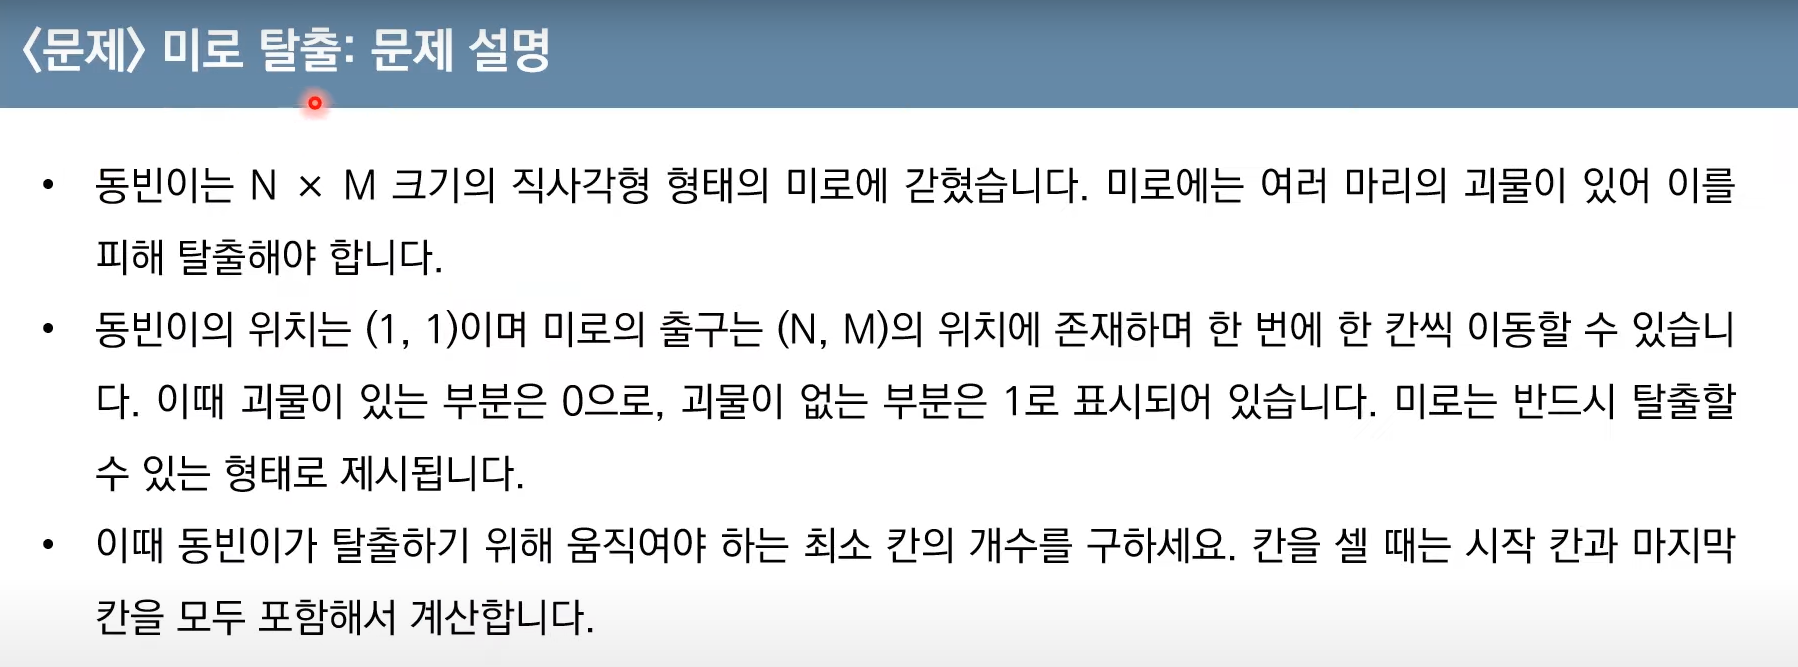

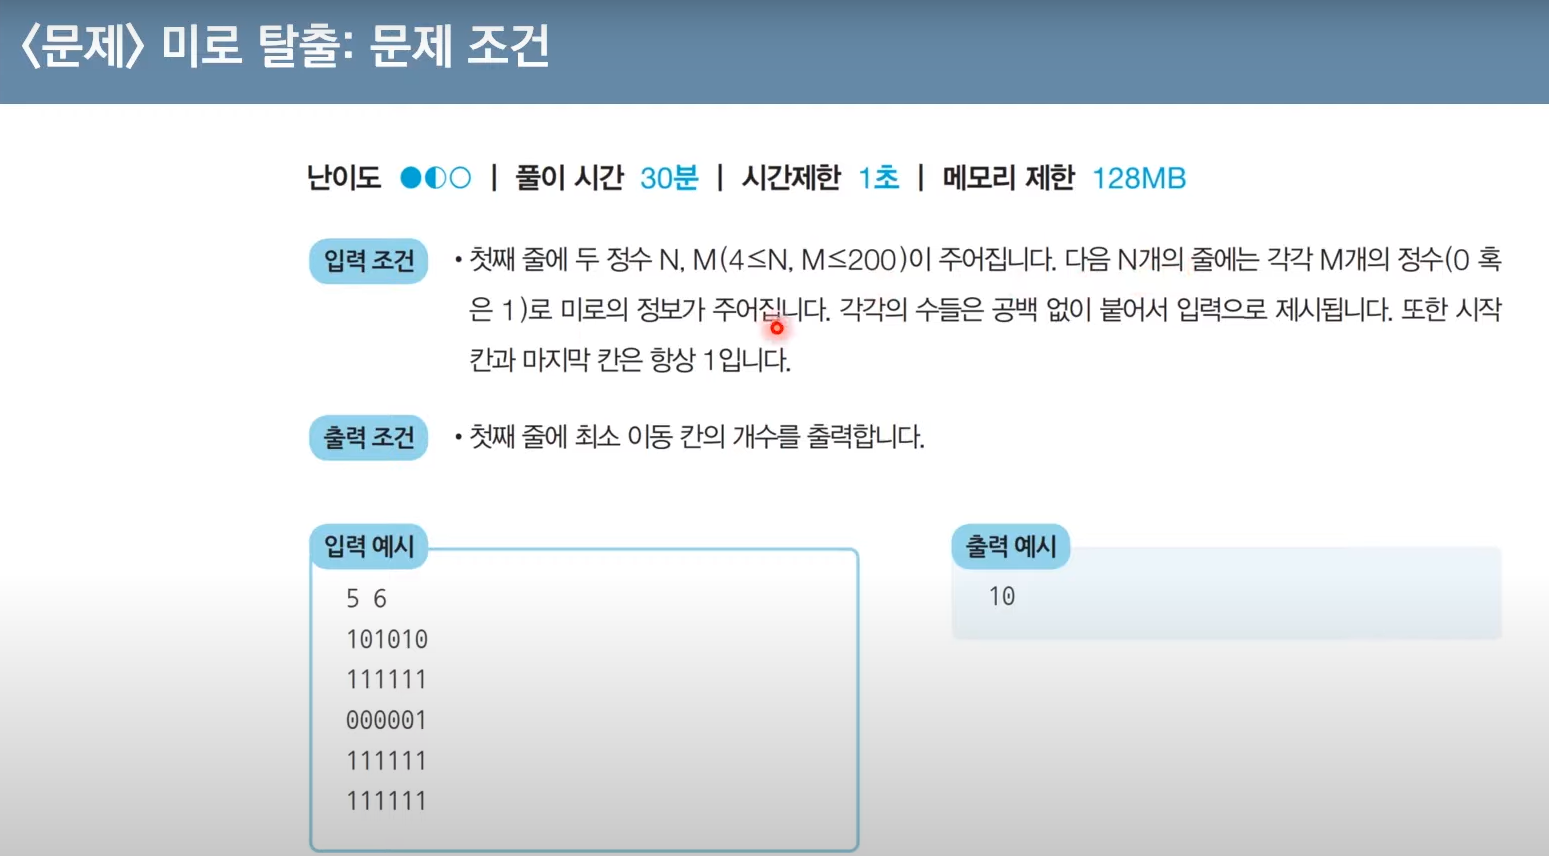

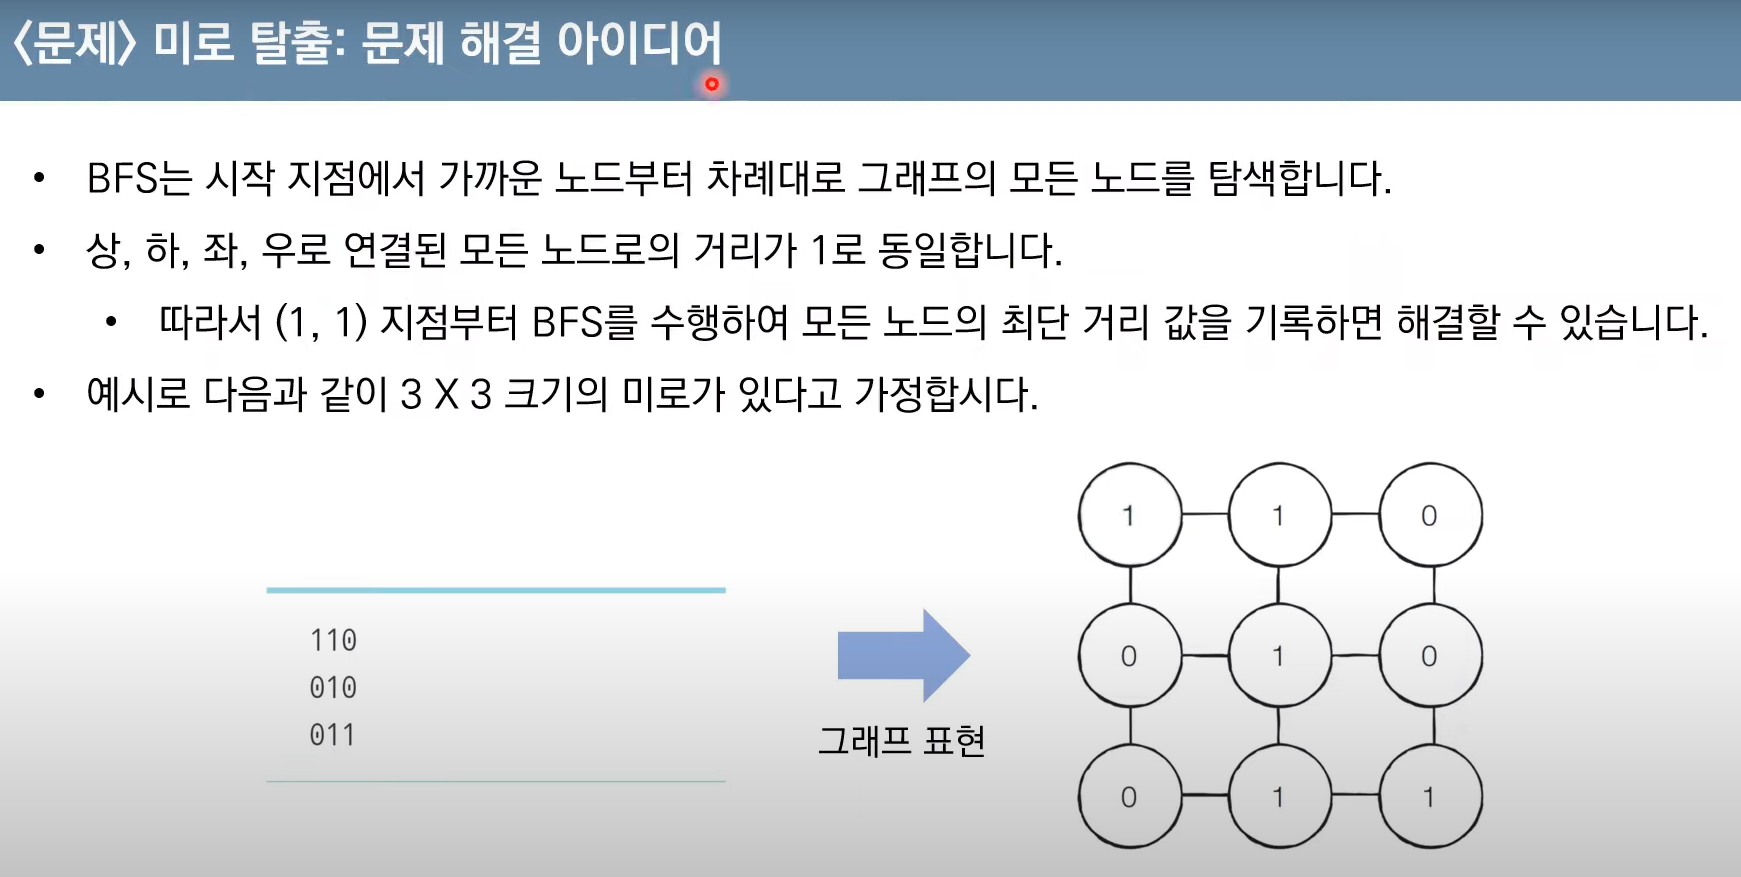

In [13]:
def bfs(x, y):
    # 최초로 들어오는 x, y 는 0,0 이다. 
    queue = deque()
    # 비어있는 큐에 x, y 를 append 해줌. 
    queue.append((x, y))
    
    #이제 queue 는 비어있지 않음. while 문이 돌아갈거다.
    while queue:
        # 0,0 이 추출되어 나올거임. 
        x, y = queue.popleft()
        print("현재 좌표 : ", x, ", ", y)
        # 4가지 방향으로 확인해야해서... range (4)
        for i in range(4):
            
            # 만약 0,0 이라면, 차례대로 dx = [-1, 1, 0, 0], dy = [0,0,-1,1]
            nx = x + dx[i] 
            ny = y + dy[i] 
            
            # print("상 nx, ny =", nx, ",",ny if i ==0 else "하 nx, ny =", nx, ",",ny if i ==1 else "좌 nx, ny =", nx, ",",ny  if i==2 else "우 nx, ny =", nx,",",ny )
            print("nx, ny : ", nx, ",", ny)
            
            # 1회차때 : nx = -1 , ny = 0 이 나올거. -> 첫 관문에서 걸러짐
            # 2회차때 : nx = 1, ny = 0 -> graph[1][0] -> 1 이므로, graph[0][0] = 1인데, +1 해서 2를 graph[1][0] 에다가 집어넣음. 
            # 한마디로 징검다리 건넣다는 표시이자 내가 얼만큼 왔는지를 +1로 표시. 
            # 그리고 나서 비어있던 queue 에 새로운 기준이 된 노드의 좌표를 append 해줌. 
            # 이렇게 되면 사실상 재귀함수는 아니고, while 반복문. 즉, 마지막 (n-1, m-1) 위치까지 가서 큐가 비어질 때 이 반복문이 끝남. 
            # 마지막은 graph[4][5] 일텐데, 1 +1을 다시 graph[nx][ny]에다가 넣음. 
            # 그리고 while 문의 처음으로 돌아가면, 
            if nx < 0 or nx >= n or ny < 0 or ny>=m:
                print("첫번째 칸 or 마지막 칸")
                continue
            
            #벽인 경우
            if graph[nx][ny] == 0:
                print("벽이다. 노드의 값이 0이라는 뜻이야")
                continue
            
            #해당 노드 첫 방문 시
            if graph[nx][ny] == 1:
                print("미로 탈출에 한발더 가까워지는 중")
                graph[nx][ny] = graph[x][y] + 1
                print("queue에 넣을 좌표 : ", nx, ny)
                queue.append((nx, ny))
                
    return graph[n-1][m-1]

In [14]:
# 큐를 쓸때는 deque 를 임포트해서 쓰는게 효율성이 더 좋다고 함. 
from collections import deque

n, m = map(int, input().split())

graph = []
for i in range(n):
    graph.append(list(map(int, input())))
    
#이동할 네 가지 방향 (상, 하, 좌,우)
dx = [-1, 1, 0, 0]
dy = [0,0,-1,1]
            
# 첫 시작은 무조건 0,0 이므로.             
print(bfs(0,0))

현재 좌표 :  0 ,  0
nx, ny :  -1 , 0
첫번째 칸 or 마지막 칸
nx, ny :  1 , 0
미로 탈출에 한발더 가까워지는 중
queue에 넣을 좌표 :  1 0
nx, ny :  0 , -1
첫번째 칸 or 마지막 칸
nx, ny :  0 , 1
벽이다. 노드의 값이 0이라는 뜻이야
현재 좌표 :  1 ,  0
nx, ny :  0 , 0
미로 탈출에 한발더 가까워지는 중
queue에 넣을 좌표 :  0 0
nx, ny :  2 , 0
벽이다. 노드의 값이 0이라는 뜻이야
nx, ny :  1 , -1
첫번째 칸 or 마지막 칸
nx, ny :  1 , 1
미로 탈출에 한발더 가까워지는 중
queue에 넣을 좌표 :  1 1
현재 좌표 :  0 ,  0
nx, ny :  -1 , 0
첫번째 칸 or 마지막 칸
nx, ny :  1 , 0
nx, ny :  0 , -1
첫번째 칸 or 마지막 칸
nx, ny :  0 , 1
벽이다. 노드의 값이 0이라는 뜻이야
현재 좌표 :  1 ,  1
nx, ny :  0 , 1
벽이다. 노드의 값이 0이라는 뜻이야
nx, ny :  2 , 1
벽이다. 노드의 값이 0이라는 뜻이야
nx, ny :  1 , 0
nx, ny :  1 , 2
미로 탈출에 한발더 가까워지는 중
queue에 넣을 좌표 :  1 2
현재 좌표 :  1 ,  2
nx, ny :  0 , 2
미로 탈출에 한발더 가까워지는 중
queue에 넣을 좌표 :  0 2
nx, ny :  2 , 2
벽이다. 노드의 값이 0이라는 뜻이야
nx, ny :  1 , 1
nx, ny :  1 , 3
미로 탈출에 한발더 가까워지는 중
queue에 넣을 좌표 :  1 3
현재 좌표 :  0 ,  2
nx, ny :  -1 , 2
첫번째 칸 or 마지막 칸
nx, ny :  1 , 2
nx, ny :  0 , 1
벽이다. 노드의 값이 0이라는 뜻이야
nx, ny :  0 , 3
벽이다. 노드의 값이 0이라는 뜻이야
현재 좌표 :  1 ,  3
nx, ny

# 내가 bfs 다시 안보고 해보기

In [4]:
# 미로의 크기 n, m
n, m = map(int, input().split())

# 미로 정보
graph = []

# 미로의 행을 순회하는 i는 0부터 n-1 까지.
for i in range(n):
    # 행의 수만큼 숫자를 입력받음. 
    graph.append(list(map(int, input())))
    
# bfs 함수를 호출하기
# 가장 핵심 조건은 무조건 graph[0][0]에서 시작해서 graph[n-1][m-1]로 가야하는거....




[[1, 0, 1, 0, 1, 0], [1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
